# WALTER M NYAMUTAMBA
# REG: R206226E
# CODE: HDSC204

# Question One

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# raeding our dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/description.csv',encoding='latin-1')

In [ ]:
# reading head of the dataset
df.head()

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_id      136 non-null    float64
 1   name         123 non-null    object 
 2   description  122 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


# column book_id, name,description has missing values 7, 20, 21 respectively we have to fill missing values since machine learining models dont work well the data with missing values

In [ ]:
# view number of missing values in each column
df.isnull().sum()

book_id         7
name           20
description    21
dtype: int64

In [ ]:
# filling missing values with forwad fill method
df.fillna(method = 'ffill',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_id      143 non-null    float64
 1   name         143 non-null    object 
 2   description  143 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [ ]:
books = df.iloc[:,-1].values.astype('U')


In [ ]:
books

array(['A tender, moving tale of unconditional love in a family that, despite its profound flaws, gave the author the fiery determination to carve out a successful life on her own terms.\nJeannette Walls grew up with parents whose ideals and stubborn nonconformity were both their curse and their salvation. Rex and Rose Mary Walls had four children. In the beginning, they lived like nomads, moving among Southwest desert towns, camping in the mountains. Rex was a charismatic, brilliant man who, when sober, captured his children\'s imagination, teaching them physics, geology, and above all, how to embrace life fearlessly. Rose Mary, who painted and wrote and couldn\'t stand the responsibility of providing for her family, called herself an "excitement addict." Cooking a meal that would be consumed in fifteen minutes had no appeal when she could make a painting that might last forever. \nLater, when the money ran out, or the romance of the wandering life faded, the Walls retreated to the di

In [ ]:
# (a)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(books)

In [ ]:
# (b)
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(max_iter=100, n_clusters=10, n_init=1)

In [ ]:
df['cluster'] = model.labels_


In [ ]:
df

,book_id,name,description,cluster
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in...",6
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi...",5
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...,4
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an...",5
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...,4
...,...,...,...,...
138,3549.0,The Scientist as Rebel (New York Review Books),"From Galileo to todays amateur astronomers, s...",0
139,2307.0,The Life and Love of Dogs,"Once you have had a wonderful dog, a life with...",1
140,690.0,Fish Tales: Stories & Recipes from Sustainable...,From the wild salmon caught in the Yukon river...,5
141,3329.0,Health: The Basics (11th Edition),This Edition of Donatelles text provides stud...,9


In [ ]:
# (C)
print(f"Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(3):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print("\n")

Top terms per cluster:
Cluster 0:
 freddy
 science
 grade
 fair
 lucky
 charlie
 school
 salma
 clear
 plan


Cluster 1:
 disorder
 does
 traig
 sleep
 mommy
 dogs
 little
 life
 dog
 offers


Cluster 2:
 cnidarians
 biology
 book
 popular
 animals
 group
 phylum
 contains
 details
 volume




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Testing the model

Y = vectorizer.transform(["chrome browser open"])
prediction = model.predict(Y)
print(f"Prediction :{prediction}")

Prediction :[5]


In [ ]:
# (d)
cluster_num = df.iloc[135]["cluster"]
print(f"Cluster for 136th book :{cluster_num}")

Cluster for 136th book :4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


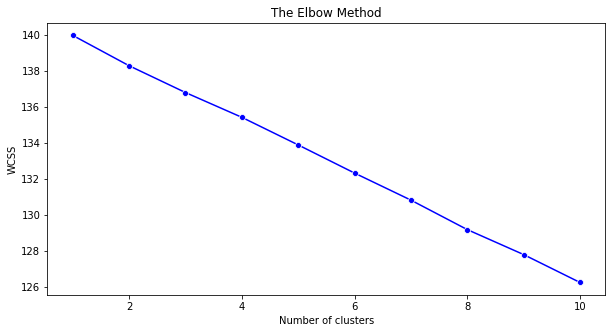

In [ ]:
# (e)
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Question TWO

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/memproc.csv')

In [ ]:
df2.head()

,host,proc,mem,state
0,crisnd6378,-1.735788,-0.722979,Normal
1,crisnd5885,-0.568770,-1.934926,Normal
2,crisnd4508,-1.102691,-2.629311,Normal
3,crisnd6376,-2.010346,-1.778285,Normal
4,crisnd1301,-0.683525,-0.396034,Normal


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   host    247 non-null    object 
 1   proc    247 non-null    float64
 2   mem     247 non-null    float64
 3   state   247 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


In [ ]:
df2['state'].value_counts()

Normal      194
Infected     53
Name: state, dtype: int64

In [ ]:
df2['state'].unique()

array(['Normal', 'Infected'], dtype=object)

In [ ]:
# (a)
df2.drop(['host'],axis=1,inplace=True)

In [ ]:
df2.head()

,proc,mem,state
0,-1.735788,-0.722979,Normal
1,-0.568770,-1.934926,Normal
2,-1.102691,-2.629311,Normal
3,-2.010346,-1.778285,Normal
4,-0.683525,-0.396034,Normal


In [ ]:
df2.tail()

,proc,mem,state
242,3.142826,0.329150,Infected
243,1.054215,0.711637,Infected
244,0.410152,2.400802,Infected
245,-0.075083,-0.571929,Normal
246,0.172419,0.808297,Infected


In [ ]:
df2.describe()

,proc,mem
count,247.000000,247.000000
mean,-0.428731,-0.518138
std,1.228676,1.311917
min,-3.151675,-3.593867
25%,-1.205594,-1.420167
50%,-0.448406,-0.621155
75%,0.368877,0.241259
max,3.142826,3.218415


In [ ]:
# (b)
df2['state'],_=pd.factorize(df2['state'])

In [ ]:
df2.head()

,proc,mem,state
0,-1.735788,-0.722979,0
1,-0.568770,-1.934926,0
2,-1.102691,-2.629311,0
3,-2.010346,-1.778285,0
4,-0.683525,-0.396034,0


In [ ]:
df2['state'].value_counts()

0    194
1     53
Name: state, dtype: int64

In [ ]:
X = df2.drop(['state'],axis=1)
y = df2['state']

In [ ]:
X.head()

,proc,mem
0,-1.735788,-0.722979
1,-0.568770,-1.934926
2,-1.102691,-2.629311
3,-2.010346,-1.778285
4,-0.683525,-0.396034


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: state, dtype: int64

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# (c)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(197, 2)

In [ ]:
X_test.shape

(50, 2)

In [ ]:
y_train.shape

(197,)

In [ ]:
y_test.shape

(50,)

In [ ]:
# (d)
ada = AdaBoostClassifier()

In [ ]:
#TRAIN the ADABOOST model
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
#Predict
ypred_ad = ada.predict(X_test)

In [ ]:
print('The classification report for Adaboost is:\n',classification_report(y_test,ypred_ad))

The classification report for Adaboost is:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.82      0.90      0.86        10

    accuracy                           0.94        50
   macro avg       0.90      0.93      0.91        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
# (e)
grad =  GradientBoostingClassifier()

In [ ]:
#Train the GradientBoosting Model
grad.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
#Predict using GradientDescent
y_gr = grad.predict(X_test)

In [ ]:
print('The classification report for Gradientboost classifier is:\n', classification_report(y_test,y_gr))

The classification report for Gradientboost classifier is:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.80      0.80      0.80        10

    accuracy                           0.92        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.92      0.92      0.92        50



In [ ]:
# (f)
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Define the respective models for the VotingClassifier
dtc = DecisionTreeClassifier()
svm_cl = SVC()
naive = GaussianNB()

In [ ]:
#Define a Hard Voting Classifier
vt_clc = VotingClassifier(estimators=[('DTC',dtc),('SVM',svm_cl),('Naive',naive)],voting='hard')
vt_clc.fit(X_train,y_train)

VotingClassifier(estimators=[('DTC', DecisionTreeClassifier()), ('SVM', SVC()),
                             ('Naive', GaussianNB())])

In [ ]:
#Predicting on the voting classifier
y_vot = vt_clc.predict(X_test)

In [ ]:
#Print the classification report of the voting classifier
print('The Classification Report for voting classifier is:\n', classification_report(y_test,y_vot))

The Classification Report for voting classifier is:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.82      0.90      0.86        10

    accuracy                           0.94        50
   macro avg       0.90      0.93      0.91        50
weighted avg       0.94      0.94      0.94        50



In [ ]:
# (b)
#The Voting classifier is the Best of the three because it has a higher recall of 97% compared to the others

# Question THREE

In [ ]:
pip install apyori

In [ ]:
 # (a)
import matplotlib.pyplot as plt
from apyori import apriori
trans_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/transactions.csv",header=None)

In [ ]:
trans_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,27,35.0,70.0,158.0,173.0,175.0,196.0,296.0,319.0,336.0,366.0,377.0,411.0,415.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93,104.0,127.0,131.0,175.0,207.0,280.0,443.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,96.0,197.0,240.0,355.0,450.0,471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,104.0,131.0,151.0,207.0,269.0,362.0,415.0,443.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70,227.0,240.0,263.0,280.0,335.0,471.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trans_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,27,35.0,70.0,158.0,173.0,175.0,196.0,296.0,319.0,336.0,366.0,377.0,411.0,415.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93,104.0,127.0,131.0,175.0,207.0,280.0,443.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,96.0,197.0,240.0,355.0,450.0,471.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,104.0,131.0,151.0,207.0,269.0,362.0,415.0,443.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70,227.0,240.0,263.0,280.0,335.0,471.0,487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19714 entries, 0 to 19713
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19714 non-null  int64  
 1   1       19684 non-null  float64
 2   2       19552 non-null  float64
 3   3       19284 non-null  float64
 4   4       18624 non-null  float64
 5   5       17471 non-null  float64
 6   6       16264 non-null  float64
 7   7       14637 non-null  float64
 8   8       12696 non-null  float64
 9   9       10541 non-null  float64
 10  10      8573 non-null   float64
 11  11      6549 non-null   float64
 12  12      4863 non-null   float64
 13  13      3424 non-null   float64
 14  14      2328 non-null   float64
 15  15      1479 non-null   float64
 16  16      876 non-null    float64
 17  17      500 non-null    float64
 18  18      285 non-null    float64
 19  19      168 non-null    float64
 20  20      80 non-null     float64
 21  21      45 non-null     float64
 22

In [ ]:
trans_data.interpolate(method='linear',inplace=True)
trans_data.dropna(axis=1, how='any', inplace =True)


In [ ]:
trans_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,27,35.0,70.0,158.0,173.0,175.0,196.0,296.0,319.0,336.0,366.0,377.0,411.0,415.000000,450.000000
1,93,104.0,127.0,131.0,175.0,207.0,280.0,443.0,489.0,387.0,375.8,387.0,417.6,407.142857,442.285714
2,43,96.0,197.0,240.0,355.0,450.0,471.0,429.0,466.0,438.0,385.6,397.0,424.2,399.285714,434.571429
3,72,104.0,131.0,151.0,207.0,269.0,362.0,415.0,443.0,489.0,395.4,407.0,430.8,391.428571,426.857143
4,70,227.0,240.0,263.0,280.0,335.0,471.0,487.0,381.0,425.5,405.2,417.0,437.4,383.571429,419.142857


In [ ]:
records = []
for i in range(0, 50):
  records.append([str(trans_data.values[i,j]) for j in range(0, 14)])

association_rules = apriori(records, min_support=0.10,min_confidence=0.2, min_lift=3, min_length=2)

assoc_results = list(association_rules)

In [ ]:
for value in assoc_results:

# first index of the inner list

# Contains base item and add item

  pair = value[0]

  items = [x for x in pair]

  print("Rule: " + items[0] + " -> " + items[1])

#second index of the inner list

  print("Support: " + str(value[1]))

#third index of the list located at 0th

#of the third index of the inner list

  print("Confidence: " + str(value[2][0][2]))

  print("Lift: " + str(value[2][0][3]))

  print()

Rule: 131.0 -> 104.0
Support: 0.2
Confidence: 0.7692307692307693
Lift: 3.4965034965034967

Rule: 104.0 -> 443.0
Support: 0.22
Confidence: 0.8461538461538461
Lift: 3.254437869822485

Rule: 489.0 -> 104.0
Support: 0.16
Confidence: 0.6153846153846154
Lift: 3.076923076923077

Rule: 280.0 -> 127.0
Support: 0.14
Confidence: 1.0
Lift: 4.166666666666667

Rule: 289.0 -> 128.0
Support: 0.12
Confidence: 1.0
Lift: 8.333333333333334

Rule: 301.0 -> 128.0
Support: 0.12
Confidence: 1.0
Lift: 7.142857142857142

Rule: 471.0 -> 128.0
Support: 0.1
Confidence: 0.8333333333333334
Lift: 4.166666666666667

Rule: 131.0 -> 207.0
Support: 0.22
Confidence: 1.0
Lift: 3.125

Rule: 131.0 -> 443.0
Support: 0.2
Confidence: 0.9090909090909092
Lift: 3.4965034965034967

Rule: 131.0 -> 489.0
Support: 0.16
Confidence: 0.7272727272727273
Lift: 3.6363636363636362

Rule: 27.0 -> 175.0
Support: 0.14
Confidence: 0.7777777777777779
Lift: 5.555555555555556

Rule: 296.0 -> 175.0
Support: 0.14
Confidence: 0.7777777777777779
Lift: 

In [ ]:
support=[]
items=[]
prcnt=[]
antcnt=[]
confidence=[]
lift=[]
for i in assoc_results:
    support.append(i.support)
    items.append(i.items)
    prcnt.append(i.ordered_statistics[0][1])
    antcnt.append(i.ordered_statistics[0][0])
    confidence.append(i.ordered_statistics[0][2])
    lift.append(i.ordered_statistics[0][3])

In [ ]:
data=pd.DataFrame({'Items':items,'Antecedent':antcnt,'Precedent':prcnt,'Support':support,
                  'Confidence':confidence,'Lift':lift})

In [ ]:
data

,Items,Antecedent,Precedent,Support,Confidence,Lift
0,"(131.0, 104.0)",(104.0),(131.0),0.20,0.769231,3.496503
1,"(104.0, 443.0)",(104.0),(443.0),0.22,0.846154,3.254438
2,"(489.0, 104.0)",(104.0),(489.0),0.16,0.615385,3.076923
3,"(280.0, 127.0)",(127.0),(280.0),0.14,1.000000,4.166667
4,"(289.0, 128.0)",(128.0),(289.0),0.12,1.000000,8.333333
...,...,...,...,...,...,...
93,"(415.0, 411.0, 296.0, 27.0, 175.0)",(175.0),"(27.0, 411.0, 415.0, 296.0)",0.10,0.555556,5.555556
94,"(415.0, 411.0, 27.0, 175.0, 319.0)",(175.0),"(319.0, 27.0, 411.0, 415.0)",0.10,0.555556,5.555556
95,"(415.0, 411.0, 296.0, 175.0, 319.0)",(175.0),"(319.0, 411.0, 415.0, 296.0)",0.12,0.666667,5.555556
96,"(415.0, 411.0, 296.0, 27.0, 319.0)",(27.0),"(319.0, 411.0, 415.0, 296.0)",0.10,0.714286,5.952381


In [ ]:
 # (b)
data.sort_values(by='Lift',axis = 0,ascending = False,inplace=True)
data.head()

,Items,Antecedent,Precedent,Support,Confidence,Lift
73,"(471.0, 301.0, 289.0, 128.0)",(128.0),"(471.0, 289.0, 301.0)",0.10,0.833333,8.333333
4,"(289.0, 128.0)",(128.0),(289.0),0.12,1.000000,8.333333
64,"(471.0, 301.0, 289.0)",(289.0),"(471.0, 301.0)",0.10,0.833333,8.333333
41,"(471.0, 289.0, 128.0)",(128.0),"(471.0, 289.0)",0.10,0.833333,8.333333
40,"(301.0, 289.0, 128.0)",(128.0),"(301.0, 289.0)",0.12,1.000000,8.333333
